<a href="https://colab.research.google.com/github/Akhil-811/Iris-Flowers-Classification/blob/main/Iris_Flowers_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df=pd.read_csv("Iris flower.csv")
df

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-versicolor
146,147,6.3,2.5,5.0,1.9,Iris-versicolor
147,148,6.5,3.0,5.2,2.0,Iris-versicolor
148,149,6.2,3.4,5.4,2.3,Iris-versicolor


In [ ]:
df.head()

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.050667,3.757333,1.198667
std,43.445368,0.828066,0.425014,1.766213,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.200000,6.900000,2.500000


In [ ]:
df.nunique()

id               150
SepalLengthCm     35
SepalWidthCm      22
PetalLengthCm     43
PetalWidthCm      22
Species            2
dtype: int64

In [ ]:
df.tail()

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-versicolor
146,147,6.3,2.5,5.0,1.9,Iris-versicolor
147,148,6.5,3.0,5.2,2.0,Iris-versicolor
148,149,6.2,3.4,5.4,2.3,Iris-versicolor
149,150,5.9,3.0,5.1,1.8,Iris-versicolor


In [ ]:
df['SepalWidthCm'].value_counts()

3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     8
3.5     6
3.8     6
3.3     6
2.6     5
2.3     4
3.7     3
2.4     3
3.9     3
2.2     3
3.6     3
4.0     1
4.1     1
4.2     1
2.0     1
Name: SepalWidthCm, dtype: int64

In [ ]:
df.columns

Index(['id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
n = len(df[df['Species'] == 'Iris-versicolor'])
print("No of Versicolor in Dataset:",n)

No of Versicolor in Dataset: 100


In [ ]:
n1 = len(df[df['Species'] == 'Iris-virginica'])
print("No of Virginica in Dataset:",n1)

No of Virginica in Dataset: 0


In [ ]:
n2 = len(df[df['Species'] == 'Iris-setosa'])
print("No of Setosa in Dataset:",n2)

No of Setosa in Dataset: 50


In [ ]:
df.isnull().sum()

id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.corr()

,id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
id,1.000000,0.716676,-0.394945,0.882892,0.899759
SepalLengthCm,0.716676,1.000000,-0.110210,0.871001,0.817954
SepalWidthCm,-0.394945,-0.110210,1.000000,-0.419992,-0.355479
PetalLengthCm,0.882892,0.871001,-0.419992,1.000000,0.962575
PetalWidthCm,0.899759,0.817954,-0.355479,0.962575,1.000000


<Axes: >

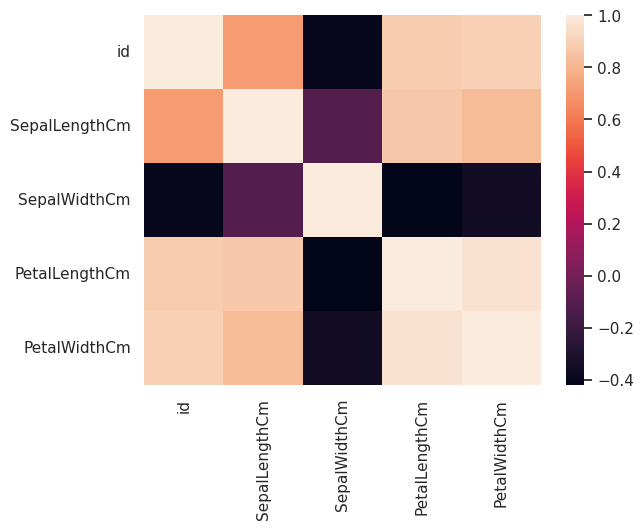

In [ ]:
sns.heatmap(df.corr())

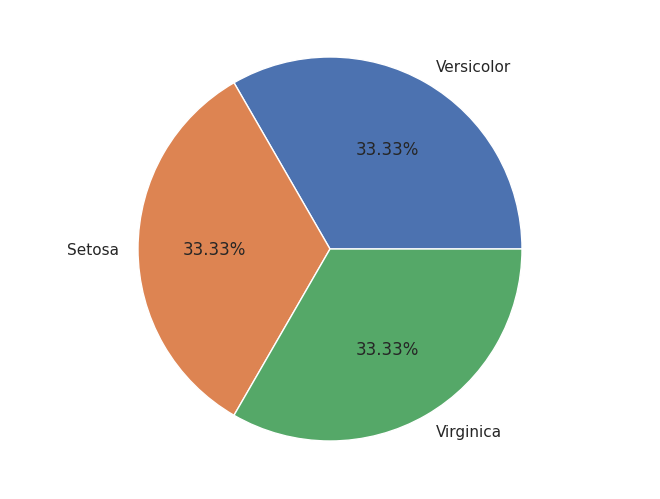

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')

plt.show()

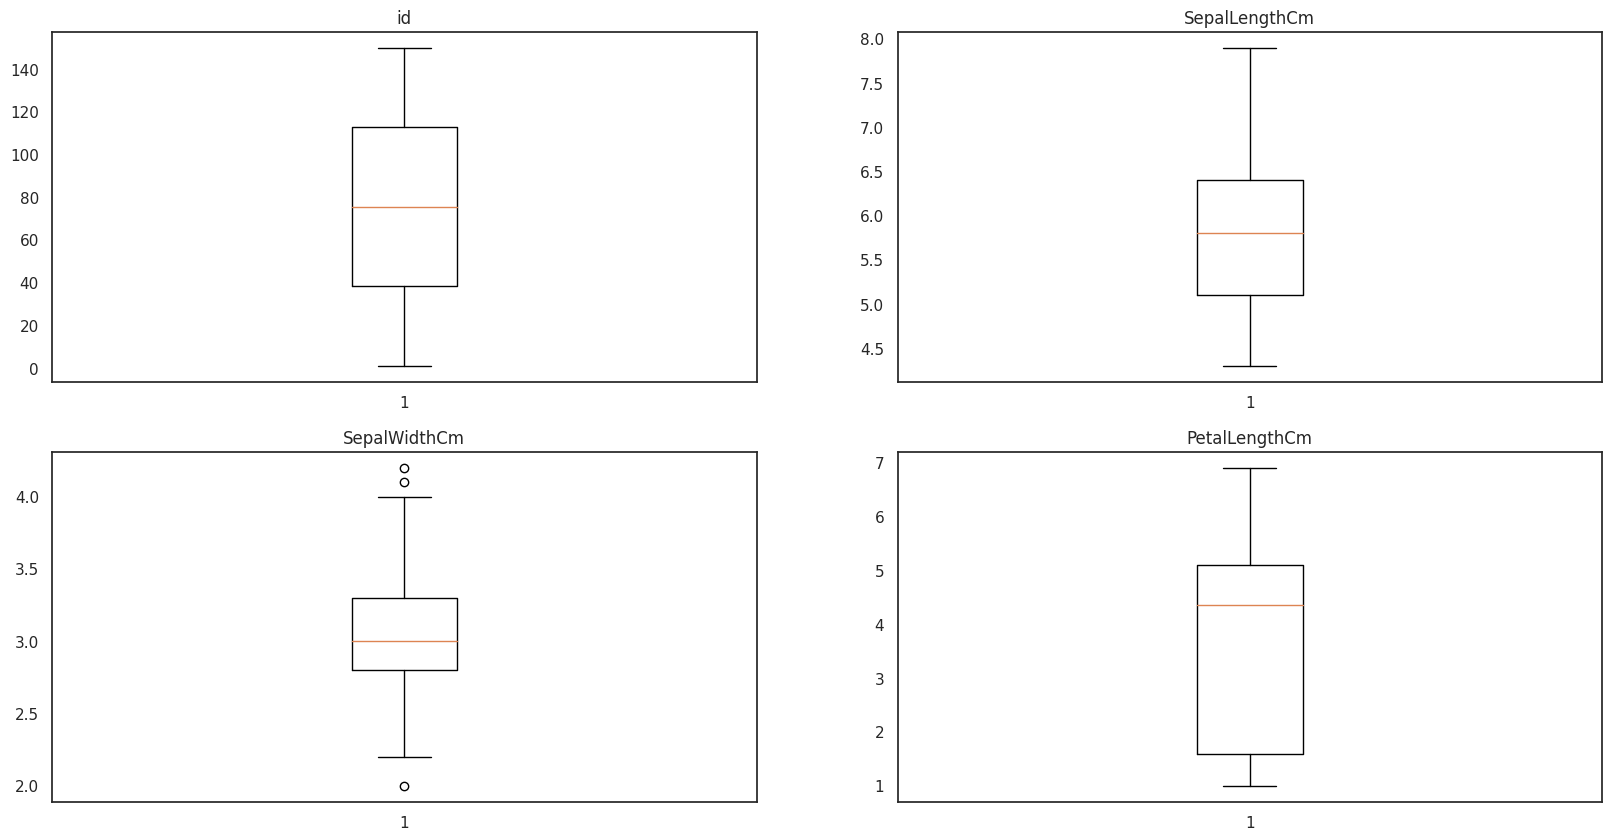

In [ ]:
rows = 2
cols = 2
fig, axs = plt.subplots(rows,cols)
index=-1
for i in range(rows):
  for j in range(cols):
    index+=1
    axs[i,j].boxplot(df[df.columns[index]])
    axs[i,j].set_title(df.columns[index])
fig.set_size_inches(20,10)
fig.show()

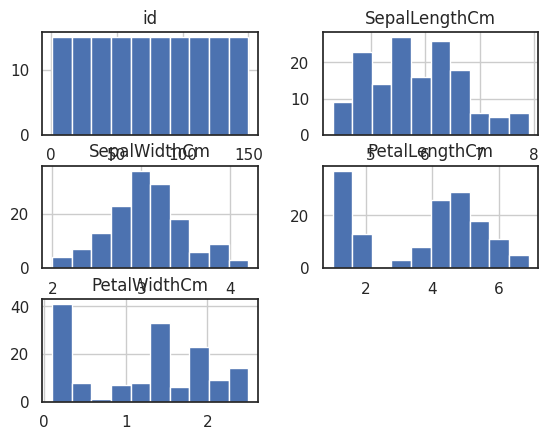

In [ ]:
df.hist()
plt.show()

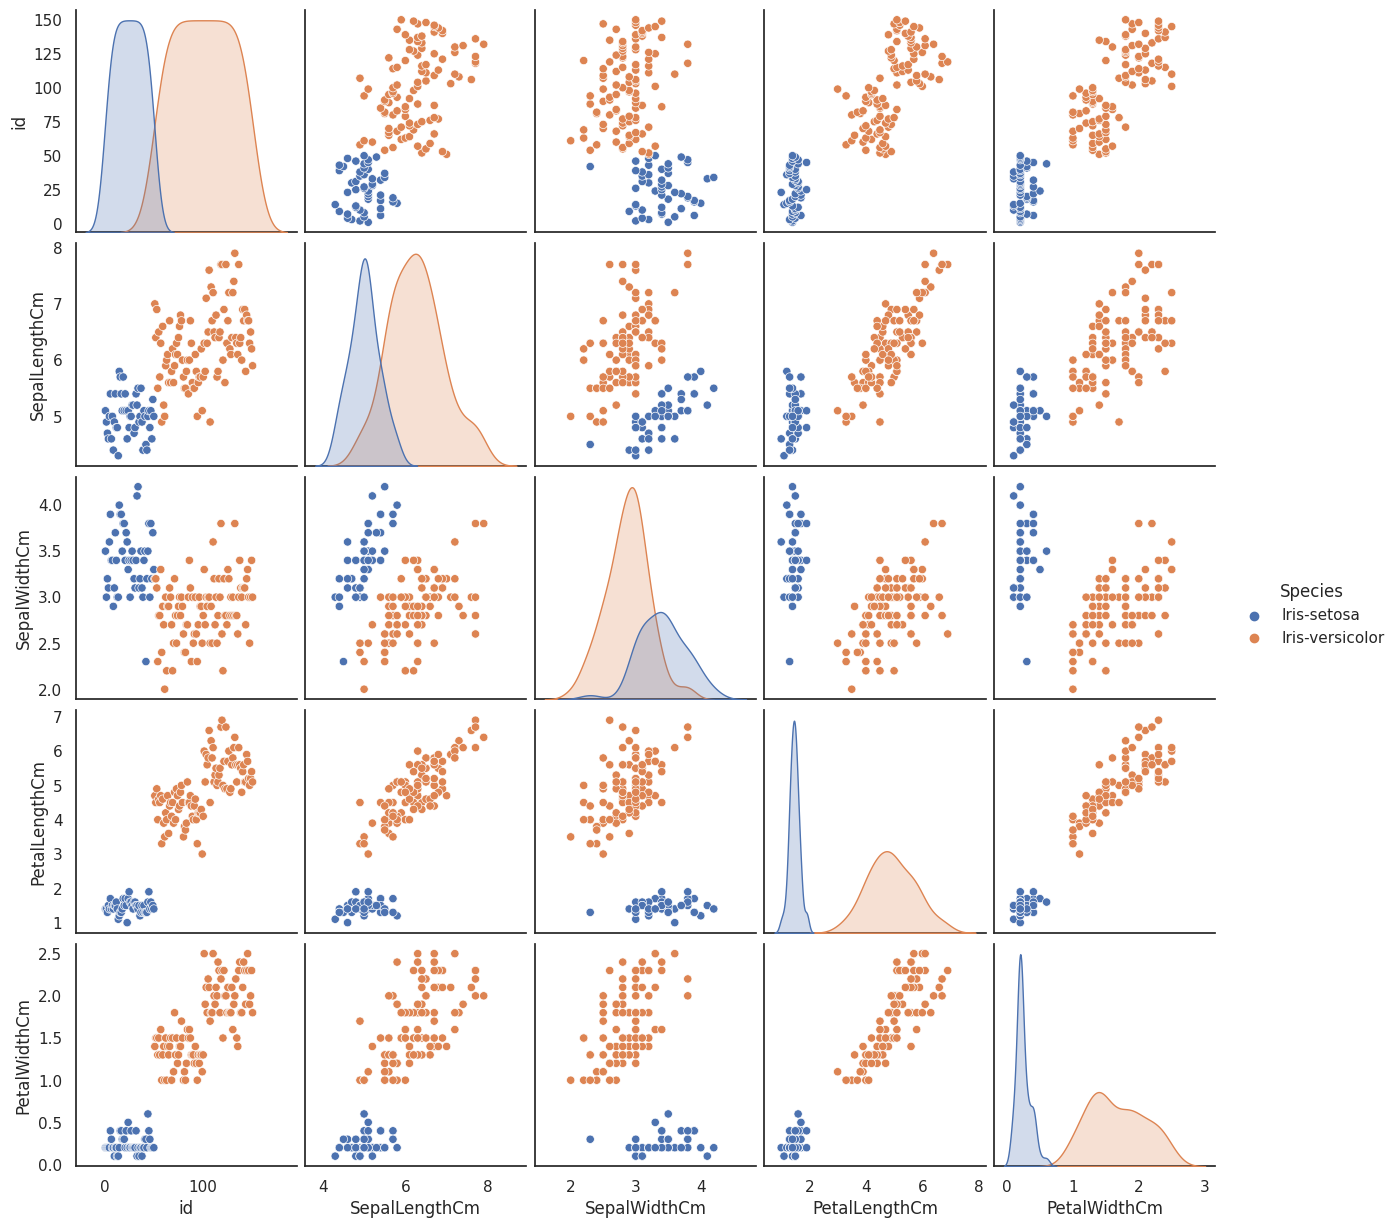

In [ ]:
sns.pairplot(df,hue='Species');

In [ ]:
train, test = train_test_split(df, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 6)
(38, 6)


In [ ]:
train_X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
train_y = df.Species

test_X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
test_y = df.Species

In [ ]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
test_y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [ ]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))

Accuracy: 1.0


In [ ]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(train_X,train_y)

pred_y = model1.predict(test_X)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(test_y,pred_y))

Acc= 1.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_X,train_y)
y_pred2 = model2.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred2))

Accuracy Score: 1.0


In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines','KNN'],
    'Score': [0.97,0.97,0.96]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.97,Logistic Regression
0.97,Support Vector Machines
0.96,KNN


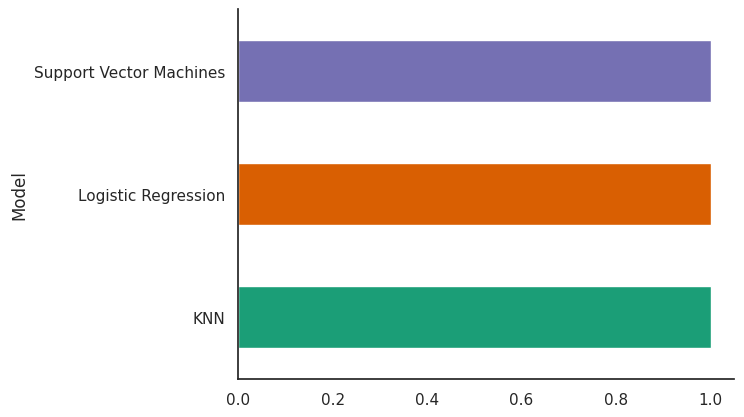

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)